# Plotting separate PTE terms for all simulations 

Ting-Chen Chen (ting-chen.chen@kit.edu) 

In [1]:
dt = 6
data_res  = '1x1latlon'
if   dt == 1:
     data_dt = '1hrly'
elif dt == 6:
     data_dt = '6hrly'
        
p2level = 50
boxsize =  10

In [2]:
#####################################################
# cyclone specific data
#####################################################
# channel_Xkm_0001: control simulations
# channel_Xkm_0002: +4K, qv consistent with T
# channel_Xkm_0003: +4k, qv from control
# channel_Xkm_0004: +temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0005: +tropical temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0006: +polar temperature anomaly from MPI-ESM1-2-LR far future

# Note that the  2-km experiments contain outputs every 6 hrs
# Note that the 80-km experiments contain outputs every 1 hrs


expname = {
      1: 'CTL',    
      2: 'T+4K',
      3: 'T+4K_RH-',
      4: 'T+anom',
      5: 'T+TRanom_TR',
      6: 'T+POanom'
         }

exp80 = { 
      1:'channel_80km_0001',
      2:'channel_80km_0002',
      3:'channel_80km_0003',
      4:'channel_80km_0004',
      5:'channel_80km_0005',
      6:'channel_80km_0006',
      }

exp2 = { 
      1:'channel_2km_0001',
      2:'channel_2km_0002',
      3:'channel_2km_0003',
      4:'channel_2km_0004',
      5:'channel_2km_0005',
      6:'channel_2km_0006',
      }

exp2n = { 
      1:'channel_2km_0001n',
      2:'channel_2km_0002n',
      3:'channel_2km_0003n',
      4:'channel_2km_0004n',
      5:'channel_2km_0005n',
      6:'channel_2km_0006n',
      }



In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import psutil
import datetime
import time as tm
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings("ignore")

In [4]:
def relativemag(x, y):
    rmag=abs(x)/abs(y)*100.    
    return rmag


In [5]:
#res='80km'
#####################################################
# Read in PTE track data from file
#####################################################
#Cyclone Track
#path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_PTE_timeseries/'
#path_track = '/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/PTE/cyclone_PTE_timeseries/'
path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_PTE_timeseries/'
dur = {}
pmin = {}
dpmin = {}
dp = {}
dfi = {}
ep = {}
itt = {}
eq1res = {}
tadv = {}
vmt = {}
sta = {}
omg = {}
diab = {}
diablh = {}
diabpc = {}
diablwr= {}
diabswr= {}
diabtur= {}
eq2res = {}
diabptend = {}

tadv_perc={}
diab_perc={}
i=1
for boxsize in [3,6,10]:
    
    exp=exp80
    ifile    ='PTE_for_channel_80km_0001_'+data_dt+'_'+data_res+'_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_ddt_temp.csv'
    print(ifile)
    df_track = pd.read_csv(path_track+ifile)
        #ntrack = len(df_track['lat']) 
    dur[i] = df_track['time']+1
        #lon  = df_track['lon']
        #lat  = df_track['lat'] 
    pmin[i]      = df_track['pmin']
    dpmin[i]     = df_track['pmin'].diff()
    dp[i]        = df_track['dp'] 
    dfi[i]       = df_track['dfi']                      
    ep[i]        = df_track['ep']    
    itt[i]       = df_track['itt'] 
    eq1res[i]    = df_track['eq1res']                     
    tadv[i]      = df_track['tadv']
    vmt[i]       = df_track['vmt']
        #sta[exp[i]]       = df_track['sta']*100.
        #omg[exp[i]]       = df_track['omg']*100.
    diab[i]      = df_track['diab']
    diablh[i]    = df_track['diablh']
    diabpc[i]    = df_track['diabpc']
    diablwr[i]   = df_track['diablwr']
    diabswr[i]   = df_track['diabswr']
    diabtur[i]   = df_track['diabtur']
    eq2res[i]    = df_track['eq2res'] 
    diabptend[i] = df_track['diabptend'] 
    i=i+1
        #tadv_perc[exp[i]] = df_track.apply(lambda x: relativemag(x['tadv'], x['dp']), axis=1)
        #diab_perc[exp[i]] = df_track.apply(lambda x: relativemag(x['diab'], x['dp']), axis=1)


PTE_for_channel_80km_0001_6hrly_1x1latlon_upper50hPa_box3_ddt_temp.csv
PTE_for_channel_80km_0001_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_80km_0001_6hrly_1x1latlon_upper50hPa_box10_ddt_temp.csv


# PLOT the time evolution of the cyclone-associated PTE 

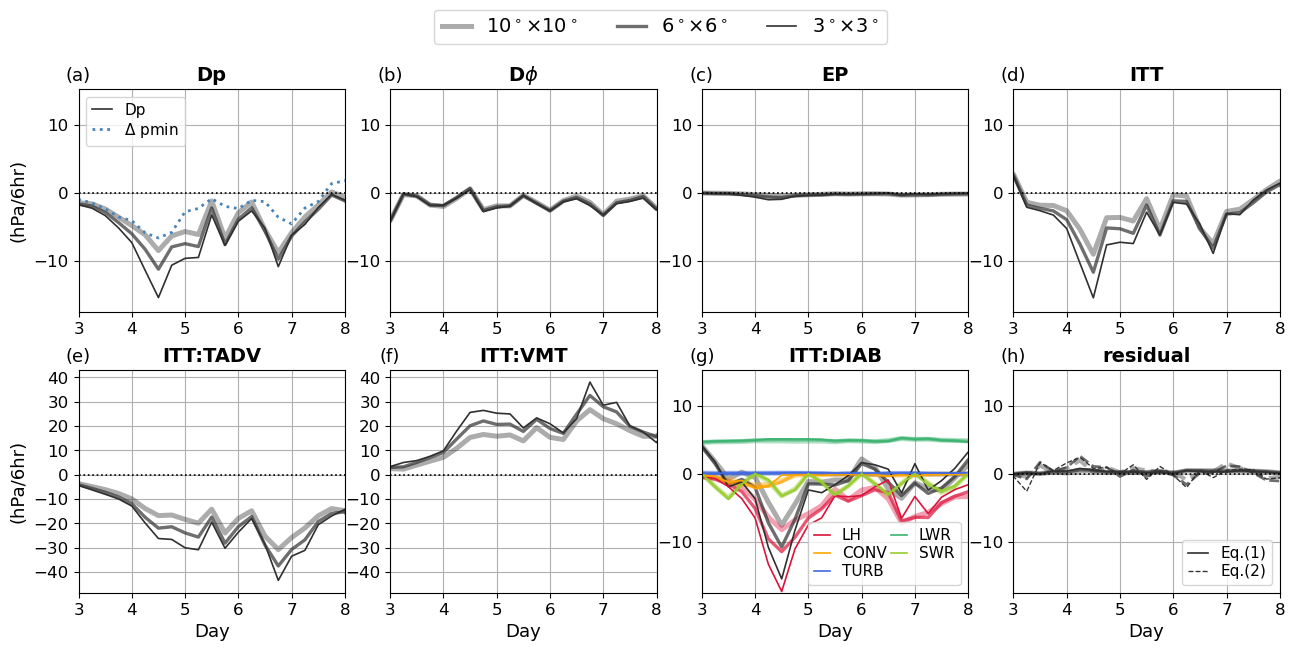

In [10]:
# For CTL 2km vs 80 km results

exp=exp80
boxname = { 
      1:'3$^\circ$'r'$\times$''3$^\circ$',
      2:'6$^\circ$'r'$\times$''6$^\circ$',
      3:'10$^\circ$'r'$\times$''10$^\circ$'} 

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

#colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}

colors={1:'#303030',2:'#303030',3:'#303030',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(15.5,7.3), sharex=False, sharey=False)
for i in range(3,0,-1): # loop over simulations
    exp=exp80
    lw=i*1.2
    al=1.3-0.3*i
    if i == 1:
        ax[0,0].plot(dur[i], dp[i], color=colors[i],
               linewidth=lw,  label='Dp', alpha=al)
        ax[0,0].plot(dur[i], dpmin[i], color='#4984b8', linestyle='dotted',
               linewidth=2, label=r'$\Delta$'' pmin', alpha=1)
    else: 
        ax[0,0].plot(dur[i], dp[i], color=colors[i],
               linewidth=lw,  alpha=al)
    ax[0,1].plot(dur[i], dfi[i], color=colors[i],
               linewidth=lw,  alpha=al, label=boxname[i])
    ax[0,2].plot(dur[i], ep[i], color=colors[i],
               linewidth=lw,  alpha=al)
    ax[0,3].plot(dur[i], itt[i], color=colors[i],
               linewidth=lw, alpha=al)
    ax[1,0].plot(dur[i], tadv[i], color=colors[i],
               linewidth=lw,  alpha=al)
    ax[1,1].plot(dur[i], vmt[i], color=colors[i],
               linewidth=lw,  alpha=al)
    ax[1,2].plot(dur[i], diab[i], color=colors[i],
               linewidth=lw,  alpha=al)
    if i ==1: 
        ax[1,2].plot(dur[i], diablh[i], color='crimson',
               linewidth=lw, alpha=al, label='LH')
        ax[1,2].plot(dur[i], diabpc[i], color='orange',
               linewidth=lw, alpha=al, label='CONV')
        ax[1,2].plot(dur[i], diabtur[i], color='royalblue',
               linewidth=lw, alpha=al, label='TURB')
        ax[1,2].plot(dur[i], diablwr[i], color='mediumseagreen',
               linewidth=lw ,alpha=al, label='LWR')
        ax[1,2].plot(dur[i], diabswr[i], color='yellowgreen',
               linewidth=lw, alpha=al, label='SWR')
        ax[1,3].plot(dur[i], eq1res[i], color=colors[i],
               linewidth=lw,  alpha=al, label='Eq.(1)')
        ax[1,3].plot(dur[i], eq2res[i], color=colors[i],
               linestyle='dashed',
               linewidth=lw*0.8,  alpha=al, label='Eq.(2)')
    else:
        ax[1,2].plot(dur[i], diablh[i], color='crimson',
               linewidth=lw, alpha=al)
        ax[1,2].plot(dur[i], diabpc[i], color='orange',
               linewidth=lw, alpha=al)
        ax[1,2].plot(dur[i], diabtur[i], color='royalblue',
               linewidth=lw, alpha=al)
        ax[1,2].plot(dur[i], diablwr[i], color='mediumseagreen',
               linewidth=lw ,alpha=al)
        ax[1,2].plot(dur[i], diabswr[i], color='yellowgreen',
               linewidth=lw, alpha=al)
        ax[1,3].plot(dur[i], eq1res[i], color=colors[i],
               linewidth=lw,  alpha=al)
        ax[1,3].plot(dur[i], eq2res[i], color=colors[i],
               linestyle='dashed',
               linewidth=lw*0.8,  alpha=al)
    #exp=exp2
    #ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', label='2 km', alpha=0.8)
    #ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3,linestyle='dotted',  alpha=0.8)
    
ax[0,0].set_title('Dp', weight='bold',fontsize=14)
ax[0,1].set_title('D'r'$\phi$', weight='bold',fontsize=14)
ax[0,2].set_title('EP', weight='bold',fontsize=14)
ax[0,3].set_title('ITT', weight='bold',fontsize=14)
ax[1,0].set_title('ITT:TADV', weight='bold',fontsize=14)
ax[1,1].set_title('ITT:VMT', weight='bold',fontsize=14)
ax[1,2].set_title('ITT:DIAB', weight='bold',fontsize=14)
ax[1,3].set_title('residual', weight='bold',fontsize=14)

plt.text(0, 1.1, '(a)', ha='center', va='top', transform=ax[0,0].transAxes, fontsize=13) 
plt.text(0, 1.1, '(b)', ha='center', va='top', transform=ax[0,1].transAxes, fontsize=13) 
plt.text(0, 1.1, '(c)', ha='center', va='top', transform=ax[0,2].transAxes, fontsize=13) 
plt.text(0, 1.1, '(d)', ha='center', va='top', transform=ax[0,3].transAxes, fontsize=13) 
plt.text(0, 1.1, '(e)', ha='center', va='top', transform=ax[1,0].transAxes, fontsize=13) 
plt.text(0, 1.1, '(f)', ha='center', va='top', transform=ax[1,1].transAxes, fontsize=13) 
plt.text(0, 1.1, '(g)', ha='center', va='top', transform=ax[1,2].transAxes, fontsize=13) 
plt.text(0, 1.1, '(h)', ha='center', va='top', transform=ax[1,3].transAxes, fontsize=13) 

ax[1,0].yaxis.set_ticks(np.arange(-40, 45, 10))
ax[1,1].yaxis.set_ticks(np.arange(-40, 45, 10))
ax[0,0].set_ylim((-17.5, 15.25))
ax[0,1].set_ylim((-17.5, 15.25))
ax[0,2].set_ylim((-17.5, 15.25))
ax[0,3].set_ylim((-17.5, 15.25))
ax[1,0].set_ylim(-48.5, 43)
ax[1,1].set_ylim(-48.5, 43)
ax[1,2].set_ylim(-17.5, 15.25)
ax[1,3].set_ylim(-17.5, 15.25)


ax[1,0].set_xlabel('Day', fontsize=13)
ax[1,1].set_xlabel('Day', fontsize=13)
ax[1,2].set_xlabel('Day', fontsize=13)
ax[1,3].set_xlabel('Day', fontsize=13)

ax[0,0].set_ylabel('(hPa/'+str(dt)+'hr)', fontsize=13)
ax[1,0].set_ylabel('(hPa/'+str(dt)+'hr)', fontsize=13)
ax[0,0].set_xlim((3, 8))
ax[0,1].set_xlim((3, 8))
ax[0,2].set_xlim((3, 8))
ax[0,3].set_xlim((3, 8))
ax[1,0].set_xlim((3, 8))
ax[1,1].set_xlim((3, 8))
ax[1,2].set_xlim((3, 8))
ax[1,3].set_xlim((3, 8))

#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,1].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,2].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,3].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,0].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,1].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
#ax[1,2].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,3].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
#ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)

if i ==1:
    ax[0,0].legend(loc='upper left', fontsize=11,labelspacing=0.2, columnspacing=0.3,handlelength=1.3)
    ax[1,2].legend(ncol=2, loc='lower right', fontsize=11,labelspacing=0.2, columnspacing=0.3,handlelength=1)
    ax[1,3].legend(loc='lower right', fontsize=11,labelspacing=0.2, columnspacing=0.3,handlelength=1.3)
    ax[0,1].legend(ncol=3,bbox_to_anchor=(1.9, 1.4), fontsize=14,handlelength=1.5)
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.17, hspace=0.26,top=0.8)
#fig.suptitle('PTE analysis for 80-km CTL',fontsize=16, weight='bold')
#fig.suptitle('Boxsize '+str(boxsize)+'',fontsize=14, weight='bold')
plt.savefig('Fig9.png',
               bbox_inches='tight',dpi=150)

plt.show()

